***ALGORITMOS DE MACHINE LEARNING PARA ESTIMAR EL VALOR DE VENTA DE UN JUGADOR BASADO EN EL DATASET DE FIFA19***

Debido a que el problema se basa en su gran medida en predecir una variable segun la causa y efecto entre distintas variables, los algoritmos de Machine Learning a utilizar para esta problematica son los de Regression.

La data para entrenar y evluar los modelos es el dataset previamente tratado en el analisis de la base de datos original de la FIFA en el punto anterior (JupyterName = Caso_nuvo)

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
data_interes = pd.read_csv('Data_interes.csv',header=0, encoding='utf-8')

In [4]:
list(data_interes.dtypes) #ver tipo de variables

[dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')]

***PREPARACIÓN DE LA DATA:***

In [5]:
data_interes = data_interes.drop(['Name'], axis=1) #Elimino la columna Name que no va ser de interes para nuestros modelos 

In [7]:
data_interes.head(10)

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,67.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,74.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,69.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,76.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,71.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,27,91,91,93000000.0,340000.0,4.0,4.0,4.0,68.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,32,91,91,67000000.0,420000.0,4.0,4.0,4.0,68.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,31,91,91,80000000.0,455000.0,5.0,4.0,3.0,72.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,32,91,91,51000000.0,380000.0,4.0,3.0,3.0,72.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,200389,25,90,93,68000000.0,94000.0,3.0,3.0,1.0,74.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0


In [8]:
data_interes.set_index("ID",inplace=True) 

In [10]:
data_interes.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [11]:
#preparacion de las variables dependientes e independites 

X = data_interes[['Age', 'Overall', 'Potential','Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]
y= data_interes['Value']

*Divido la data entre data de entrenamiento y de preueba, se elige 80% para train y 20% test*

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(14527, 43) (3632, 43)
(14527,) (3632,)


==========================================================================

***BUILDING MODELS:***

*Con el fin de definir que modelo presenta un mejor comportamiento para el caso de estudio, se evaluaran 4 modelos diferentes de regresión, y se concluira cual seria el modelo a utilizar y por que razon, estos modelos seran entrenados con los parametros estandar. los modelos son los siguientes:*

1. Lineral Regression
2. Decision tree Regression
3. Random Forest
4. Gradient Boosting Regression Model

***LINEAR REGRESSION***

In [19]:
regresor = LinearRegression()
regresor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regresor.predict(X_test)

In [30]:
y_pred[:10]

array([ 2391344.42157392,   622329.05482981,  1560979.22848224,
         813636.49500525,   293023.29924454,   -48530.41495531,
         194266.72641087, -1659248.94729056,  1095183.79183792,
        -561018.62690995])

In [31]:
y_test[:10]

ID
224243    1200000.0
236369     425000.0
215569    1000000.0
192594    1300000.0
229189     525000.0
237332     325000.0
216138     775000.0
186646     100000.0
244105     450000.0
243921     120000.0
Name: Value, dtype: float64

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Accuracy:',format(score * 100,'.2f'),'%')
print('mse: ', mse)
print('score: ',score)
print('mae: ', mae)

Accuracy: 78.71 %
mse:  6469568152093.938
score:  0.787102938306506
mae:  1291352.7118814823


*Analisis por cross_val*

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = regresor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(scores.mean() * 100))
print("Standard Deviation: {:.2f} %".format(scores.std() * 100))

Accuracy: 79.56 %
Standard Deviation: 3.69 %


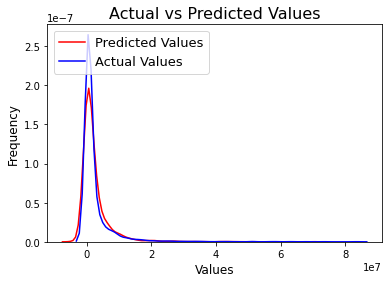

In [44]:
sb.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

***DECISION TREE REGRESSION***

In [32]:
tree_reg= DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
y_tree = tree_reg.predict(X_test)

In [37]:
mse_tree = mean_squared_error(y_test, y_tree)
mae_tree = mean_absolute_error(y_test, y_tree)
score_tree = r2_score(y_test, y_tree)
tree_rmse = np.sqrt(mse_tree)
print('Accuracy:',format(score_tree * 100,'.2f'),'%')
print('mse: ', mse_tree)
print('sqrt-mse: ', tree_rmse)
print('score: ',score_tree)
print('mae: ', mae_tree)

Accuracy: 96.92 %
mse:  936311674008.8105
sqrt-mse:  967631.9930680313
score:  0.9691883600976868
mae:  183562.7753303965


*Analisis por cross_val*

In [38]:
scores_tree = cross_val_score(estimator = tree_reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(scores_tree.mean() * 100))
print("Standard Deviation: {:.2f} %".format(scores_tree.std() * 100))

Accuracy: 95.14 %
Standard Deviation: 1.96 %


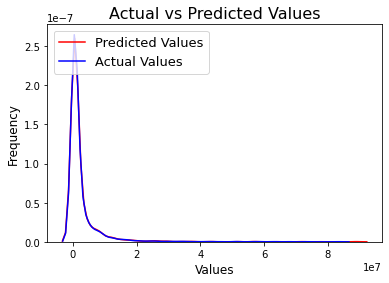

In [45]:
sb.distplot(y_tree, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

***RANDOM FOREST***

In [39]:
forest_reg = RandomForestRegressor(n_estimators = 300)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [40]:
y_forest = forest_reg.predict(X_test)

In [41]:
mse_forest = mean_squared_error(y_test, y_forest)
mae_forest = mean_absolute_error(y_test, y_forest)
score_forest = r2_score(y_test, y_forest)
forest_rmse = np.sqrt(mse_forest)
print('Accuracy:',format(score_forest * 100,'.2f'),'%')
print('mse: ', mse_forest)
print('sqrt-mse: ', forest_rmse)
print('score: ',score_forest)
print('mae: ', mae_forest)

Accuracy: 98.53 %
mse:  445857460974.97565
sqrt-mse:  667725.5880786475
score:  0.9853279629885386
mae:  138172.71475770924


In [42]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

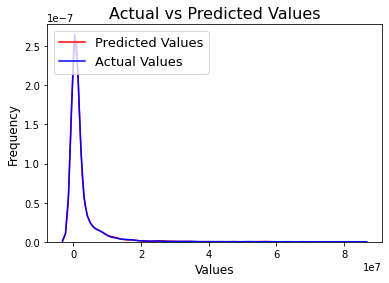

In [43]:
sb.distplot(y_forest, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)


***GRADIENT BOOSTING REGRESSION MODEL***

In [48]:
grad_reg = GradientBoostingRegressor(n_estimators = 500)
grad_reg.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [49]:
y_grad = grad_reg.predict(X_test)

In [50]:
mse_grad = mean_squared_error(y_test, y_grad)
mae_grad = mean_absolute_error(y_test, y_grad)
score_grad = r2_score(y_test, y_grad)
grad_rmse = np.sqrt(mse_grad)
print('Accuracy:',format(score_grad * 100,'.2f'),'%')
print('mse: ', mse_grad)
print('sqrt-mse: ', grad_rmse)
print('score: ',score_grad)
print('mae: ', mae_grad)

Accuracy: 99.17 %
mse:  252888450841.46777
sqrt-mse:  502880.1555455015
score:  0.9916780831649571
mae:  149724.19690399352


In [54]:
scores_grad = cross_val_score(estimator = grad_reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(scores_grad.mean() * 100))
print("Standard Deviation: {:.2f} %".format(scores_grad.std() * 100))

Accuracy: 98.53 %
Standard Deviation: 0.64 %


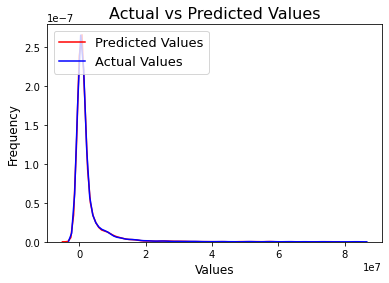

In [51]:
sb.distplot(y_grad, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [52]:
y_grad[:10]

array([1158004.88551586,  564486.66321644,  961926.87776542,
       1286341.98060431,  434694.33547757,  330009.48979238,
        693747.64982529,   77988.60769647,  445323.62912173,
        116097.35551536])

In [53]:
y_test[:10]

ID
224243    1200000.0
236369     425000.0
215569    1000000.0
192594    1300000.0
229189     525000.0
237332     325000.0
216138     775000.0
186646     100000.0
244105     450000.0
243921     120000.0
Name: Value, dtype: float64

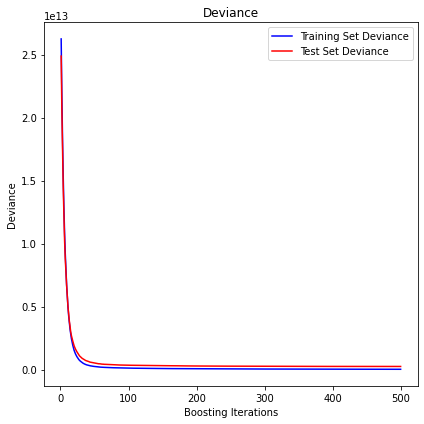

In [57]:
#Grafica de entrenamiento a partir de la documentación de sklearn

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_grad in enumerate(grad_reg.staged_predict(X_test)):
    test_score[i] = grad_reg.loss_(y_test, y_grad)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, grad_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

*Importancia de cada caracteristica, se realiza con el fin de saber que peso tiene cada variable sobre el modelo, y discriminar si es necesario algunas, para optimizar nuestro modelo. Para ello se utilizo las funciones brindadas por la documentacion en Sklearn*

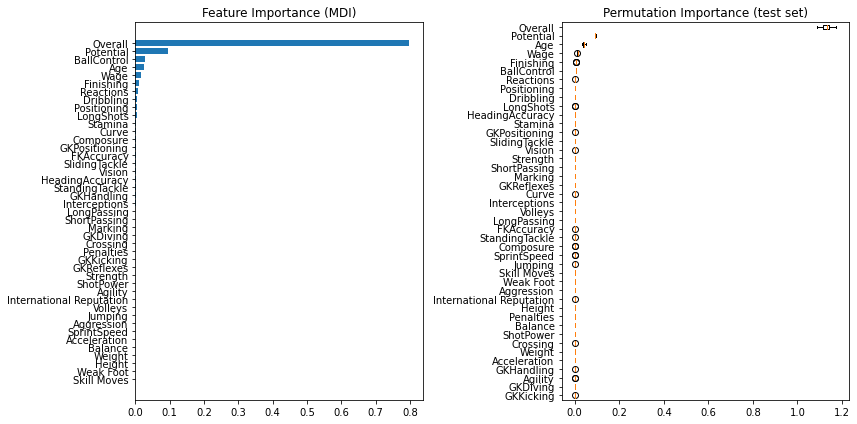

In [62]:
from sklearn.inspection import permutation_importance
feature_importance = grad_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(grad_reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [63]:
feature_importance

array([2.43375808e-02, 7.96954226e-01, 9.52701300e-02, 1.59501703e-02,
       4.91276840e-05, 4.88948993e-06, 1.39240936e-06, 1.47178889e-05,
       2.59451540e-05, 1.09597158e-04, 1.02311916e-02, 2.15457087e-04,
       1.38546883e-04, 4.52569369e-05, 5.97073239e-03, 1.33932514e-03,
       3.87814212e-04, 1.43268820e-04, 2.87525128e-02, 2.76751224e-05,
       2.81568582e-05, 5.44901004e-05, 8.13374994e-03, 2.66195293e-05,
       6.30609995e-05, 4.23341389e-05, 1.60774931e-03, 6.90350226e-05,
       3.14914480e-03, 3.10723275e-05, 1.56750110e-04, 3.74256139e-03,
       3.50936219e-04, 1.03277946e-04, 7.28077911e-04, 1.25579468e-04,
       2.05601534e-04, 3.56953056e-04, 1.15734783e-04, 1.57165227e-04,
       9.13220922e-05, 6.11649392e-04, 7.94198384e-05])

===================================================================================

***CONCLUSION:***

De los 4 modelos analizados se deduce lo siguiente:

a. En base al R-squeare score, error absoluto y error cuadratico, el modelo que presenta menor precisión en su predicción es el modelo Linear Regression. Tambien se puede apreciar en la grafica de actual vs predict el modelo presenta evidentes variaciones en la curva de predicción.

b. Tanto los modelos tree Regression, Random Forest y Gradient Boosting Regression Model presentaron un accuracy mayor al 95% permitiendo una prediccion aceptable, y se puede observar en cada una de sus graficas. Sin embargo el modelo gradient boosting fue el que mayor accuracy presento llegando a alcanzar un 99.7% y un 98.53% al analizarlo por cross value y una desviación estandar del 0.6%, es decir, el modelo que mejor se ajusta a las necesidades del problema, la cual es predecir el valor de un jugador en el mercado, es gradient boosting.

c. Al ser el modelo gradient boosting el que presento mejor resultados, se realizaron otros analisis, como la importancia de cada caracteristica, del cual se ve claramente que la variable que mayor peso tiene al momento de definir el valor de un jugador es el Overall, se intuye que si se desea saber los jugadores sobrevalorados y subvalorados en el mercado, analizar esta variable respecto al valor resulta clave.


==============================================================================

***NOTAS:***

A pesar de que los resultados fueron positivos, hay variables que no se tuvieron en cuenta al momento de construir el dataset de entrenamiento, y podrian llegar a mejorar nuestros modelos. Tambien se ha de decir que los hiperparametros de los modelos no fueron modificados ni analizados al momento de montar nuestros modelos, se usaron los parametros estandar.

Por otro lado a partir del analisis de features, hay variables que generan poco peso al momento de predecir, y se pueden omitir para optimizar el modelo 